In [1]:
import pandas as pd

In [2]:
# Load the datasets
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')

In [3]:
# Display the first few rows of each dataset
print(customers.head())
print(transactions.head())

  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15
  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


In [4]:
# Merge transactions DataFrame with customers DataFrame on the 'CustomerID' column
# This combines transaction data with corresponding customer profile information, allowing for a comprehensive

data = transactions.merge(customers, on='CustomerID')

In [5]:
# Display the first few rows of the merged dataset
print(data.head())

  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price     CustomerName         Region  SignupDate  
0      300.68  300.68   Andrea Jenkins         Europe  2022-12-03  
1      300.68  300.68  Brittany Harvey           Asia  2024-09-04  
2      300.68  300.68  Kathryn Stevens         Europe  2024-04-04  
3      601.36  300.68  Travis Campbell  South America  2024-04-11  
4      902.04  300.68    Timothy Perez         Europe  2022-03-15  


In [6]:
# Create features from transaction data

data['TotalSpent'] = data['Quantity'] * data['Price']  # Calculate total spent per transaction
customer_summary = data.groupby('CustomerID').agg({
    'TotalSpent': 'sum',                               # Total amount spent by each customer
    'TransactionID': 'count',                          # Count of transactions for each customer
    'Quantity': 'sum',                                 # Total quantity of products purchased
    'Region': 'first'                                  # Keep the region for later use
}).reset_index()


In [7]:
# Select relevant features for clustering
features = customer_summary[['TotalSpent', 'TransactionID', 'Quantity', 'Region']]

In [8]:
from sklearn.preprocessing import StandardScaler

# Convert categorical 'Region' to numerical using one-hot encoding
features = pd.get_dummies(features, columns=['Region'], drop_first=True)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt

# Initialize lists to store metrics
inertia = []
silhouette_scores = []
db_indices = []

# Determine the optimal number of clusters using the Elbow method
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(features_scaled)
    
    # Store metrics
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(features_scaled, kmeans.labels_))
    db_indices.append(davies_bouldin_score(features_scaled, kmeans.labels_))



In [ ]:
# Choose the optimal number of clusters

optimal_clusters = 4
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(features_scaled)

# Get the cluster labels
features['Cluster'] = kmeans_optimal.labels_

In [11]:
# Calculate and print the DB Index and other metrics

db_index = db_indices[optimal_clusters - 2]  # Adjust index for the chosen number of clusters


In [12]:
print(f'Number of clusters formed: {optimal_clusters}')

Number of clusters formed: 4


In [13]:
# Print the Davies-Bouldin Index for the chosen number of clusters
# The Davies-Bouldin Index is a measure of clustering quality, where lower values indicate better clustering
# It evaluates the average similarity ratio of each cluster with the cluster that is most similar to it

print(f'Davies-Bouldin Index: {db_index}')

Davies-Bouldin Index: 0.9880667545355788


In [14]:
# Print Silhouette Score for chosen number of clusters
# The Silhouette Score measures how similar an object is to its own cluster compared to other clusters

print(f'Silhouette Score: {silhouette_scores[optimal_clusters - 2]}')

Silhouette Score: 0.39637746297313897


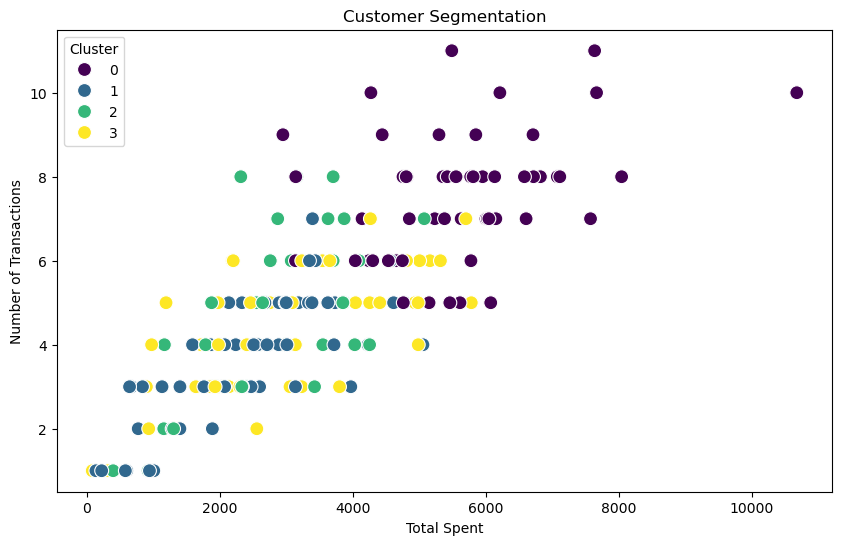

In [15]:
# Import the seaborn library for enhanced data visualization

import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x=features['TotalSpent'], y=features['TransactionID'], hue=features['Cluster'], palette='viridis', s=100)
plt.title('Customer Segmentation')
plt.xlabel('Total Spent')
plt.ylabel('Number of Transactions')
plt.legend(title='Cluster')
plt.show()


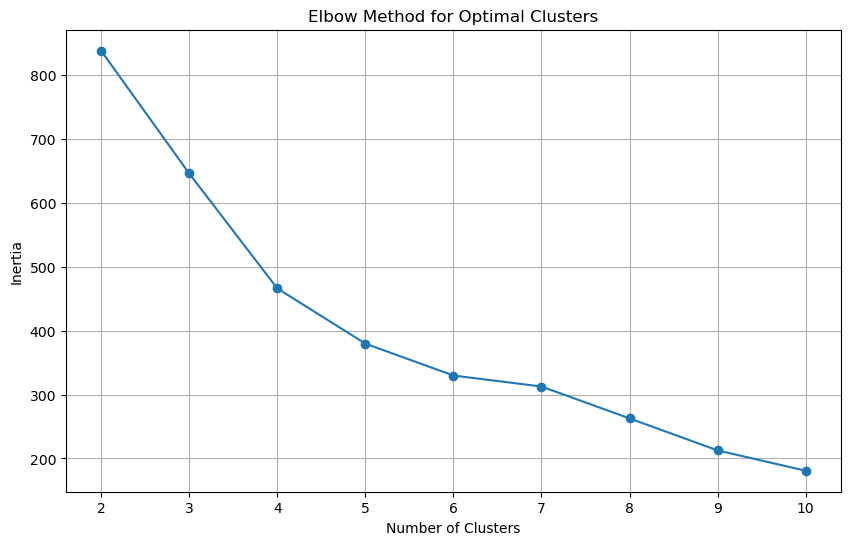

In [16]:
# Visualize the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(2, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')      # x-axis
plt.ylabel('Inertia')                 # y-axis
plt.grid()
plt.show()